<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/5_6%20%EB%B9%99%EC%82%B0%EC%9D%B8%EA%B0%80%3F_%EC%84%A0%EB%B0%95%EC%9D%B8%EA%B0%80(%EA%B0%9C_vs_%EA%B3%A0%EC%96%91%EC%9D%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 다운로드

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2024-08-21 01:39:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.207, 142.250.31.207, 142.251.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   205MB/s    in 0.3s    

2024-08-21 01:39:58 (205 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



이미지 데이터 경로 설정

In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# 기본경로
base_dir = '/content/cats_and_dogs_filtered'
# 훈련에 사용되는 개 고양이 디렉토리 경로
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir) # '/content/cats_and_dogs_filtered/train'
print(validation_dir) # '/content/cats_and_dogs_filtered/validation'

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [ ]:
# 검증에 사용되는 개 고양이 폴더 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir) # '/content/cats_and_dogs_filtered/train'
print(train_dogs_dir) # '/content/cats_and_dogs_filtered/validation'

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs


In [ ]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir) # '/content/cats_and_dogs_filtered/train'
print(validation_dogs_dir) # '/content/cats_and_dogs_filtered/validation'

/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [ ]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.260.jpg', 'cat.615.jpg', 'cat.871.jpg', 'cat.199.jpg', 'cat.255.jpg']
['dog.294.jpg', 'dog.92.jpg', 'dog.225.jpg', 'dog.486.jpg', 'dog.711.jpg']


In [ ]:
print("학습용 고양이 사진의 수 :", len(train_cats_fnames))
print("학습용 강아지 사진의 수 :", len(train_dogs_fnames))

학습용 고양이 사진의 수 : 1000
학습용 강아지 사진의 수 : 1000


In [ ]:
validation_cats_fnames=os.listdir(validation_cats_dir)
validation_dogs_fnames=os.listdir(validation_dogs_dir)

print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.2368.jpg', 'cat.2351.jpg', 'cat.2400.jpg', 'cat.2222.jpg', 'cat.2008.jpg']
['dog.2124.jpg', 'dog.2229.jpg', 'dog.2357.jpg', 'dog.2233.jpg', 'dog.2351.jpg']


In [ ]:
print("검증용 고양이 사진의 수 :", len(validation_cats_fnames))
print("검증용 강아지 사진의 수 :", len(validation_dogs_fnames))

검증용 고양이 사진의 수 : 500
검증용 강아지 사진의 수 : 500


데이터 시각화

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)for fname in
                train_cats_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in
                train_dogs_fnames[pic_index-8:pic_index]]

next_cat_pix

['/content/cats_and_dogs_filtered/train/cats/cat.260.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.615.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.871.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.199.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.255.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.533.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.976.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.586.jpg']

<Figure size 1200x1200 with 0 Axes>

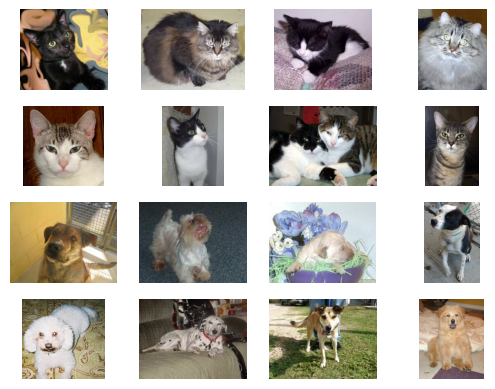

In [ ]:
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
# 이미지 픽셀을 0에서 1사이의 값으로 스케일을 조정한다

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 1000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
# 모델 구성, 드롭아웃
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape = (150,150,3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Dropout(0,2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Dropout(0,2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0,2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu',))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 38, 38, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 38, 38, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 46208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      11,829,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,116,769 (46.22 MB)

 Trainable params: 12,116,769 (46.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/63 ━━━━━━━━━━━━━━━━━━━━ 4:02 5s/step - acc: 0.4369 - loss: 0.7034

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

In [ ]:
img = image.load_img('/content/image.jpg',target_size = (150,150))
img

In [ ]:
x= image.img_to_array(img)/255
print('전'.x.shape)

In [ ]:
# 테스
import numpys as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def pred(fname):
  img = image.load_img(fname, target_size = (150,150))
  plt.imshow(img)
  x = image.img_to_array(img)/255
  images = np.expand_dims(x, axis = 0)
  classes = model.predict(images, batch_size = 1)
  print(classes[0])
  if classes[0] > 0.5:
    print(fname.split('/')]-1] + "마스크를 씀.")
  else:
    print(fname.split('/')]-1] + "마스크를 안씀.")